<a href="https://colab.research.google.com/github/DeathSlayer1707/random_gigs/blob/main/Raj_classificationmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/meltpool_dataset.csv")
print(df.head())

   Laser Power (W)  Scan Speed (mm/s)  Beam Diameter (mm)  \
0       249.816047          96.283232            1.023411   
1       480.285723         185.475237            0.993958   
2       392.797577         268.236459            2.312509   
3       339.463394         233.056222            0.999092   
4       162.407456         251.640287            1.043899   

   Cooling Rate (°C/s)  Shielding Gas Composition (%)  \
0          1172.702994                      57.199588   
1          1296.681397                      80.543233   
2           750.467899                      76.016093   
3          1124.874100                      15.389990   
4          1071.745983                      14.924947   

   Melt Pool Intensity (mm)  Melt Pool Width (mm)     Defect Type  
0                  0.651090              1.366863  Uneven Surface  
1                  0.762810              0.510295        Porosity  
2                  1.296366              1.770310  Uneven Surface  
3                 

In [4]:
X = df.drop("Defect Type",axis = 1)
y = df["Defect Type"]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y_categorical)
X_train, X_test, y_train_categorical, y_test_categorical = train_test_split(X, y_categorical, test_size=0.2, random_state=42,stratify=y_categorical)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(512, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(y_categorical.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [10]:
history = model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=32, validation_split=0.15,callbacks = early_stop)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.2669 - loss: 1.9901 - val_accuracy: 0.2250 - val_loss: 1.3961
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2851 - loss: 1.6662 - val_accuracy: 0.2500 - val_loss: 1.4000
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2923 - loss: 1.5752 - val_accuracy: 0.2167 - val_loss: 1.3995
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3056 - loss: 1.5731 - val_accuracy: 0.2333 - val_loss: 1.4103
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2943 - loss: 1.5020 - val_accuracy: 0.2417 - val_loss: 1.4130
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2988 - loss: 1.5199 - val_accuracy: 0.2333 - val_loss: 1.4339
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3233 - loss: 1.4252 - val_accuracy: 0.2417 - val_loss: 1.4519
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3175 - loss: 1.4516 - val_accuracy: 0.

Text(0, 0.5, 'Accuracy')

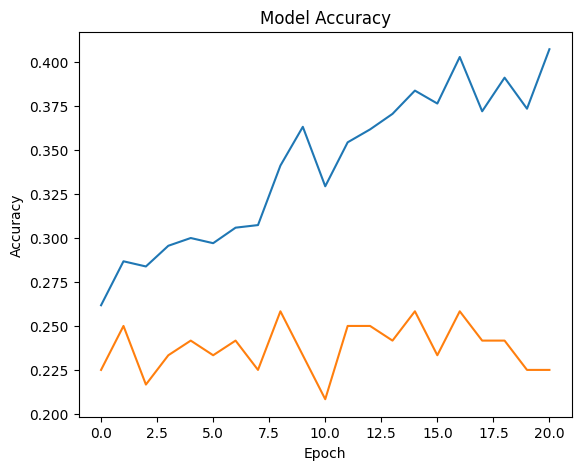

In [11]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


In [12]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled).argmax(axis=1)
y_true = y_test_categorical.argmax(axis=1)

accuracy = accuracy_score(y_true, y_pred)
print("🔹 Accuracy:", accuracy)
print("🔹 Classification Report:\n", classification_report(y_true, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
🔹 Accuracy: 0.255
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.17      0.18        47
           1       0.33      0.20      0.25        55
           2       0.26      0.63      0.37        51
           3       0.00      0.00      0.00        47

    accuracy                           0.26       200
   macro avg       0.20      0.25      0.20       200
weighted avg       0.20      0.26      0.21       200



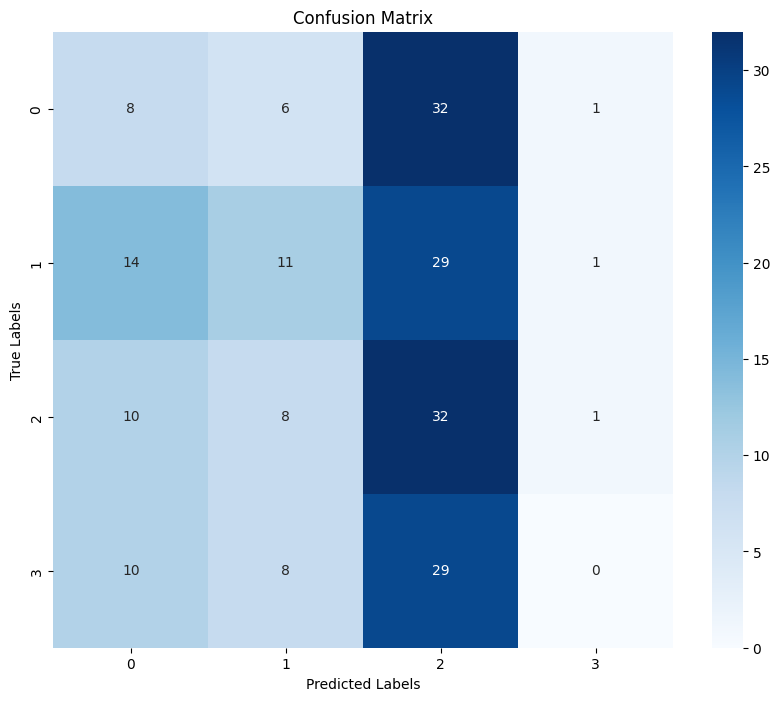

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()